In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
X = load_diabetes().data
y = load_diabetes().target

In [3]:
df = pd.DataFrame(X, columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10"])
df["y"] = y
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


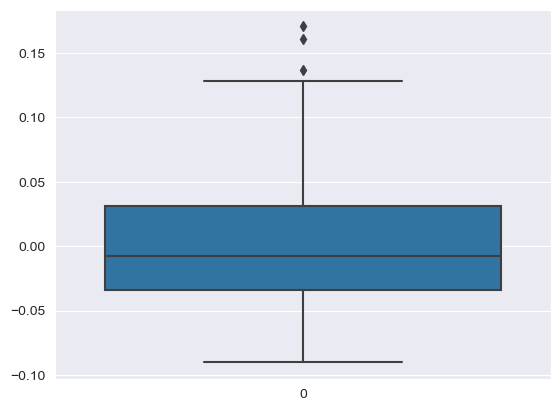

In [7]:
sns.boxplot(df["C3"])
plt.show()

In [4]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'y'], dtype='object')

In [8]:
Q1 = df["C3"].quantile(0.25)
Q3 = df["C3"].quantile(0.75)
IQR = Q3 - Q1
filter = (df["C3"] >= Q3 + 1.5 * IQR) + (df["C3"] <= Q1 - 1.5 * IQR)
df.loc[filter]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,y
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349,346.0
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628,233.0
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059,242.0


In [9]:
df.drop([256, 366, 367], inplace=True)

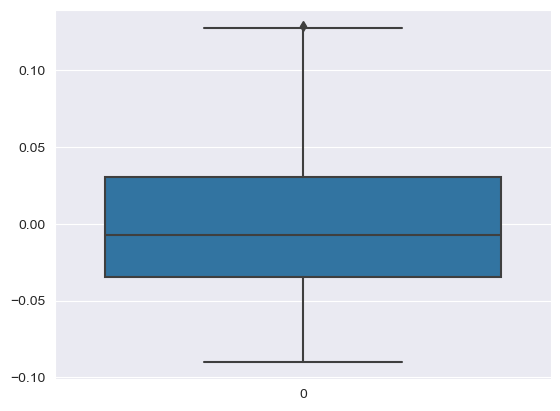

In [11]:
sns.boxplot(df["C3"])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predicted = regressor.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

41.26576212382709

In [17]:
regressor.score(X_test, y_test)

0.3503199760968895

In [16]:
from sklearn.linear_model import Lasso

regressor = Lasso()
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predicted)

48.40083857178378